<a href="https://colab.research.google.com/github/iVibudh/Fine-tune-BERT-for-Text-Classification/blob/main/Copy_of_Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

Wed Mar  2 19:53:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Ideally, we want to be assigned with "Tesla P100" or "Tesla T4 GPUs" with Kuda course. For better performance. 

If you were assigned the K80 then try to Factory restart the environment and check again.

Runtime -> Factory Reset Runtime -> Running the cell !nvidia-smi


If it is still giving you K80 then don't sweat, the code will still work in this notebook. The training will complete but might take a little longer. 

Also, if you load heavy models on your colab and the Facory reset, then there are more chances of you getting a better GPU

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [ ]:
# # Tensorflow already installed so No need to install tensorflow again. 
# !pip install -q tensorflow==2.3.0

# # need to get 2.

In [ ]:
# Clone the official Tensorflow model garden repository from Github. 
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


If Building is done then you can ignore the errors. Most of these errors are about version compatibility, in our case this should work as these packages are forward compatible. 

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
                 compression = 'zip',
                 low_memory = False)
df.shape

(1306122, 3)

In [ ]:
df.head(10)
df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


In [ ]:
pip install matplotlib==3.1.3 

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


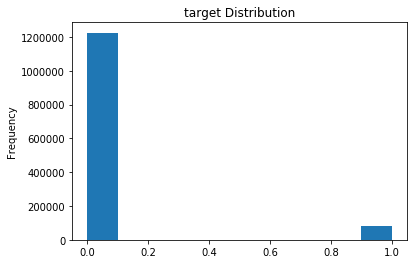

In [ ]:

df.target.plot(kind = 'hist', title = "target Distribution" )

Here we can see that there is a **class imbalace problem**. Majority of the data is good and only a small portion of the data is toxic. We will address this problem by using **stratified sampling** while we are creating our training and validation set. 

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
train_df, remaining = train_test_split(df, 
                                       random_state = 42,
                                       train_size = 0.0075, # Since our dataset is huge we only take 0.75% of the whole data for training. ~10,000 samples only 
                                       stratify = df.target.values)

valid_df, _ =   train_test_split(remaining, 
                                random_state = 42,
                                train_size = 0.00075, # Since our dataset is huge we only take 0.075% of the whole data for validation. ~1,000 samples only 
                                stratify = remaining.target.values)
train_df.shape, valid_df.shape

((9795, 3), (972, 3))

Criticisms and Drawbacks of BERT
- Expensive to train 
- Slow at inference time 

Becacause of the following:
- size of the model. 
- 109M+ parameters.  
- I/O pipeline bottleneck (moving from CPU, RAM and GPU)

To improve our model we need to make sure that we are super efficient during our preprocessing and dataloading phase. For this, we will be using tf.data API to reduce the time required to complete the steps. 

- Basically tf.data helps to build an efficient pipeline. This allows us to do all the preprocessing steps on the CPU, so that the GPU is available for the BERT model (No GPU overhead). The preprocessing will be done while the BERT is working so the preprocessed text is ready for the BERT model. 
- The preprocessing step is parallelized across multiple CPU cores as inputs are independent. Each input elemet needs to be preprocessed to generate:
- - TokenIDs
- - (generate) Input Mask IDs
- - (generate) Input Type IDs


This is made pussible by the argument in the td.data by defining how meny threads do you need in muli-processing. 

To create a datapipeline, we need to start with the data scource. To construct a dataset from data in memory you can use the tf.data.tensors method or the tf.data.tensonslices method. The return object is Python itterable - so we could use that in a for loop.

In [ ]:
# this creates tf dataset for the training data 
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df.question_text.values,
                                                   train_df.target.values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.question_text.values, 
                                                   valid_df.target.values))
  
# These dataset objects which will be returned using this function is a Python itterable, so we can consume its elements using a for loop. 

# Here, we are looking at the 1st element of the dataset. 
# Number of elements you want to look at are given by the argument of the take() function. take(1) will return 1 pair. 
  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
# Here, we are looking at the 1st element of the dataset. 
# Number of elements you want to look at are given by the argument of the take() function. take(1) will return 1 pair. 
for text, label in train_data.take(3):
  print(text)
  print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Which war changed the course of history of the world?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b"I have started a YouTube channel named AskHamy (link is given below). The problem is that I don't want to show myself and instead just want to do a voice-over. What are some things which I can show on screen so that the viewers don't get bored?", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
"""
Defining Hyper-parameters and some constants 

Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0, 1] # Label categories - list of all labels
# for multiclass BERT classifier - we could define 3 or more labels here
# Other changes 1. the number of softmax units at the output of the model
# Other changes 2. Loss function from binary cross entropy to sparce categorical cross entropy 

max_seq_length = 128 # maximum length of (token) input sequences - what is length of longest question that we will allow
# BERT allows a max length of 512 tokens. 

train_batch_size = 32 

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable = True) 
# As it is suggested that we train all the paramets of the model for any specific usage. by default it is false
              
# Instantiate the tokenizer - so that it taks care of all the preporcessing that is required. 
# load the vocab of the BERT model. It is about 30k words
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() # explicit conversion from tensor to numpy

# Now, we make sure that we are dealing with the uncased version of the Bert layer that we have imported. 
# Just checking this is not actual conversion of the text
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() 

# Instantiate our tokenizer
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
type(tokenizer)

official.nlp.bert.tokenization.FullTokenizer

In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing? Hi, I went playing today.')

['hi',
 '##,',
 'how',
 'are',
 'you',
 'doing',
 '##?',
 '[UNK]',
 '[UNK]',
 'went',
 'playing',
 'today',
 '##.']

Note here than words with capital letters in them are identified as [UNK] as those words are not in the BERT vocab.

In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
# Convert these token to Token IDs
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

Here, each word is represented as a token (or a number). - an index in the vocabulary 

Also, note that for each sentence we need to do padding - add a **CLS token** (at the start) and **SEP token** (at the end) tokens to represent a sequence. We will do this by the submodules that we have cloned.

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  """ This function is used to tokenize the text. (or it generates the features needed by the BERT) 
  convert the text and label ----to----> input features and label 
  
  The inputs of the functions are:
   1. text and label of a single row 
   2. constants 
   3. tokenizer - nlp bert tokenizer 

   This function then returns the following:
   1. input_ids 
   2. input mask 
   3. input type ids (feature.label_id)
   4. label

   this generates the inputs needed for the BERT model 
   """

  #define input example
  example = classifier_data_lib.InputExample(guid=None, 
                                             text_a = text.numpy, # the text we want to classify. Also, convert it from tensor format to numpy format
                                             text_b = None, # We would use this argument in NSP - Next Sentence Prediction
                                             label = label.numpy())
  
  #Convert the exaple into features by using the constructor function
  feature = classifier_data_lib.convert_single_example(0, # index of the 0th example. since the length of exaple is only 1 
                                                       example, 
                                                       label_list, #In this case [0, 1]
                                                       max_seq_length, # in this case it is 128 
                                                       tokenizer) # also, pass our tokenizer for index values

  return(feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

  
  

**Why do we need the Input Mask?**

In our BERT model, we have defined the max_seq_length as 128. Meaning that all input sequences (or sentences) should be of 128 (as BERT takes sequences of equal lengths only). The sequences which are short will be padded. Also, these sequences will be padded with [CLS] - start token and [SEP] - end token. 

The problem with adding paddings is that we are adding elements which are not adding any meaning to the sequence. So, we use the input mask to take care of these padding words. Then the BERT model will not pay attention to these padding words. 

How it works: 

text = ["Hello how are you"]

tokens = [[CLS], "hello", "how", "are", "you", [SEP]]

token_ids = [14, 56, 26, 7888, 1090, 30229]

input_mask = [0, 1,    1,   1,   1,     0]

So, the dot product of token_ids and input_mask will remove any padding words


**Input Type ID** 

BERT was pretarained on two tasks:
- Masked language modelling - task to predict what are masked tokens are  
- NSP - next sentence prediction 

Since, in our example we are not dealing with Next sentence prediction, so do not use Input Type ID.

*text_b = None*

**What's Next... Caveat?**

We cannot directly use the function to_feature() directly to create our input datastructures (or feature datastructures). 

We want to use dt.dataset.map() to apply the function to each element of the input dataset. But dataset.map() runs in graph mode. 

This is the problem, as graph tensors do not have a value and in graph mode you can use only tensorflow ops and functions. So, basically you cannot map the function directly to our data. We need to wrap it in a tensorflow Python function class --- this will create a wrapper function 


You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
max_seq_length

128

In [ ]:
def to_feature_map(text, label):
  """ Thhis function is a wrapper function for ti_feature function 
  essentially, instead of graph function (which has no values) this 
  function will pass regular tensors (which have values)"""

  # this is the wrapper 
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, # name of the function we are wrapping 
                                                                inp = [text, label], # input of the function is going to be text and label
                                                                Tout = [tf.int32, tf.int32, tf.int32, tf.int32]) # define the output type of the function - Tensor integers
  
  # set the shape fo all these tensors as the wrapper does not do that
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  # Bundle all the input variables in a dictionary - single variable
  x = {'input_word_ids': input_ids,
       'input_mask': input_mask,
       'input_type_ids': segment_ids}

  return(x, label_id)
  
  

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [ ]:

with tf.device('/cpu:0'):
  # # train
  train_data = (train_data.map(to_feature_map, 
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))


  # valid
  valid_data = (valid_data.map(to_feature_map, #calling the wrapper function 
                                num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))

  #Tensorflow input pipeline is now created
  
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

Ref Test -> https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2


*pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])*

There are two outputs: a pooled_output of shape [batch_size, 768] with representations for the entire input sequences and a sequence_output of shape [batch_size, max_seq_length, 768] with representations for each input token (in context).

Sentence_output - This talks about the context in reference which is a representation of all input tokens. 

pooled_output roughly corresponds to the hidden state corresponding to the CLS classification token from the BERT paper. We can then pass the pooled_output through a softmax function to get the probabilities. 

In [ ]:
# Building the model
def create_model():
  # Ref (under usage) ->-> https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")
  
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  # Now we have the pooled output and the sequence output

  # here we could add a couple of dense layers but we are going to skip that for the sake of simplicity

  #Now we are going to add a few dropout layers to prevent overfitting on the training data
  # 0.4 is a very high dropout layer in general - we can experimet with this later on
  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  #now get the final classification output - this is going to be a dense layer
  output = tf.keras.layers.Dense(1, 
                          activation='sigmoid', # for binary classification we use sigmoid this converts values between -1 and 1 to 0 and 1
                          name = "output")(drop)

  model = tf.keras.Model(
      inputs = {'input_word_ids': input_word_ids,
                'input_mask': input_mask,
                'input_type_ids': input_type_ids},
      outputs = output)
  
  return model
  

## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

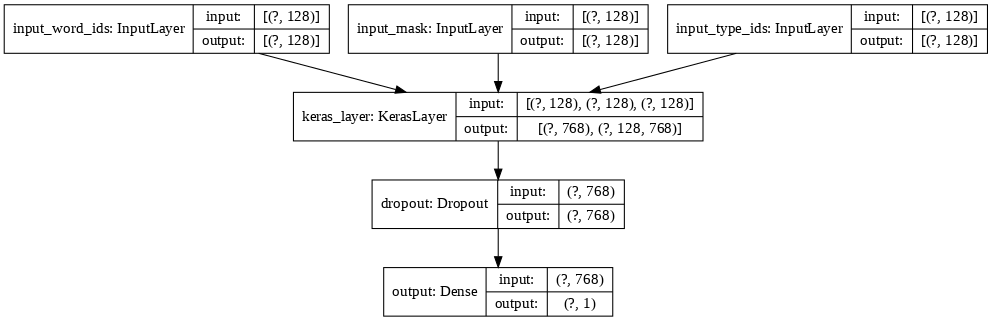

In [ ]:
tf.keras.utils.plot_model(model=model,
                          show_shapes=True,
                          dpi = 76) # by default it is 96

In [ ]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
# Train model
epochs = 3
history = model.fit(train_data,
                    validation_data = valid_data, 
                    epochs = epochs, 
                    verbose = 1)

Epoch 1/3


InvalidArgumentError: ignored

This should take about 8- 10 mins to complete. 

We are looking for an accuracy of >0.93 and loss of < 1.8 

## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
plot_graphs(history, 'binary_accuracy')

In [ ]:
sample_example = ["sentence 1", "2"] # keep it less than 32
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
threshold = 0.5 #between 0 and 1
["Insincere" if pred >= threshold else "Sincere" for pred in preds]